# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data=pd.read_csv(r"C:\Users\Microsoft\Downloads\glass.csv")
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [3]:
#Check for missing values
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
data.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
#Correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:")
print(corr_matrix)


Correlation matrix:
            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.49

<Figure size 1000x800 with 0 Axes>

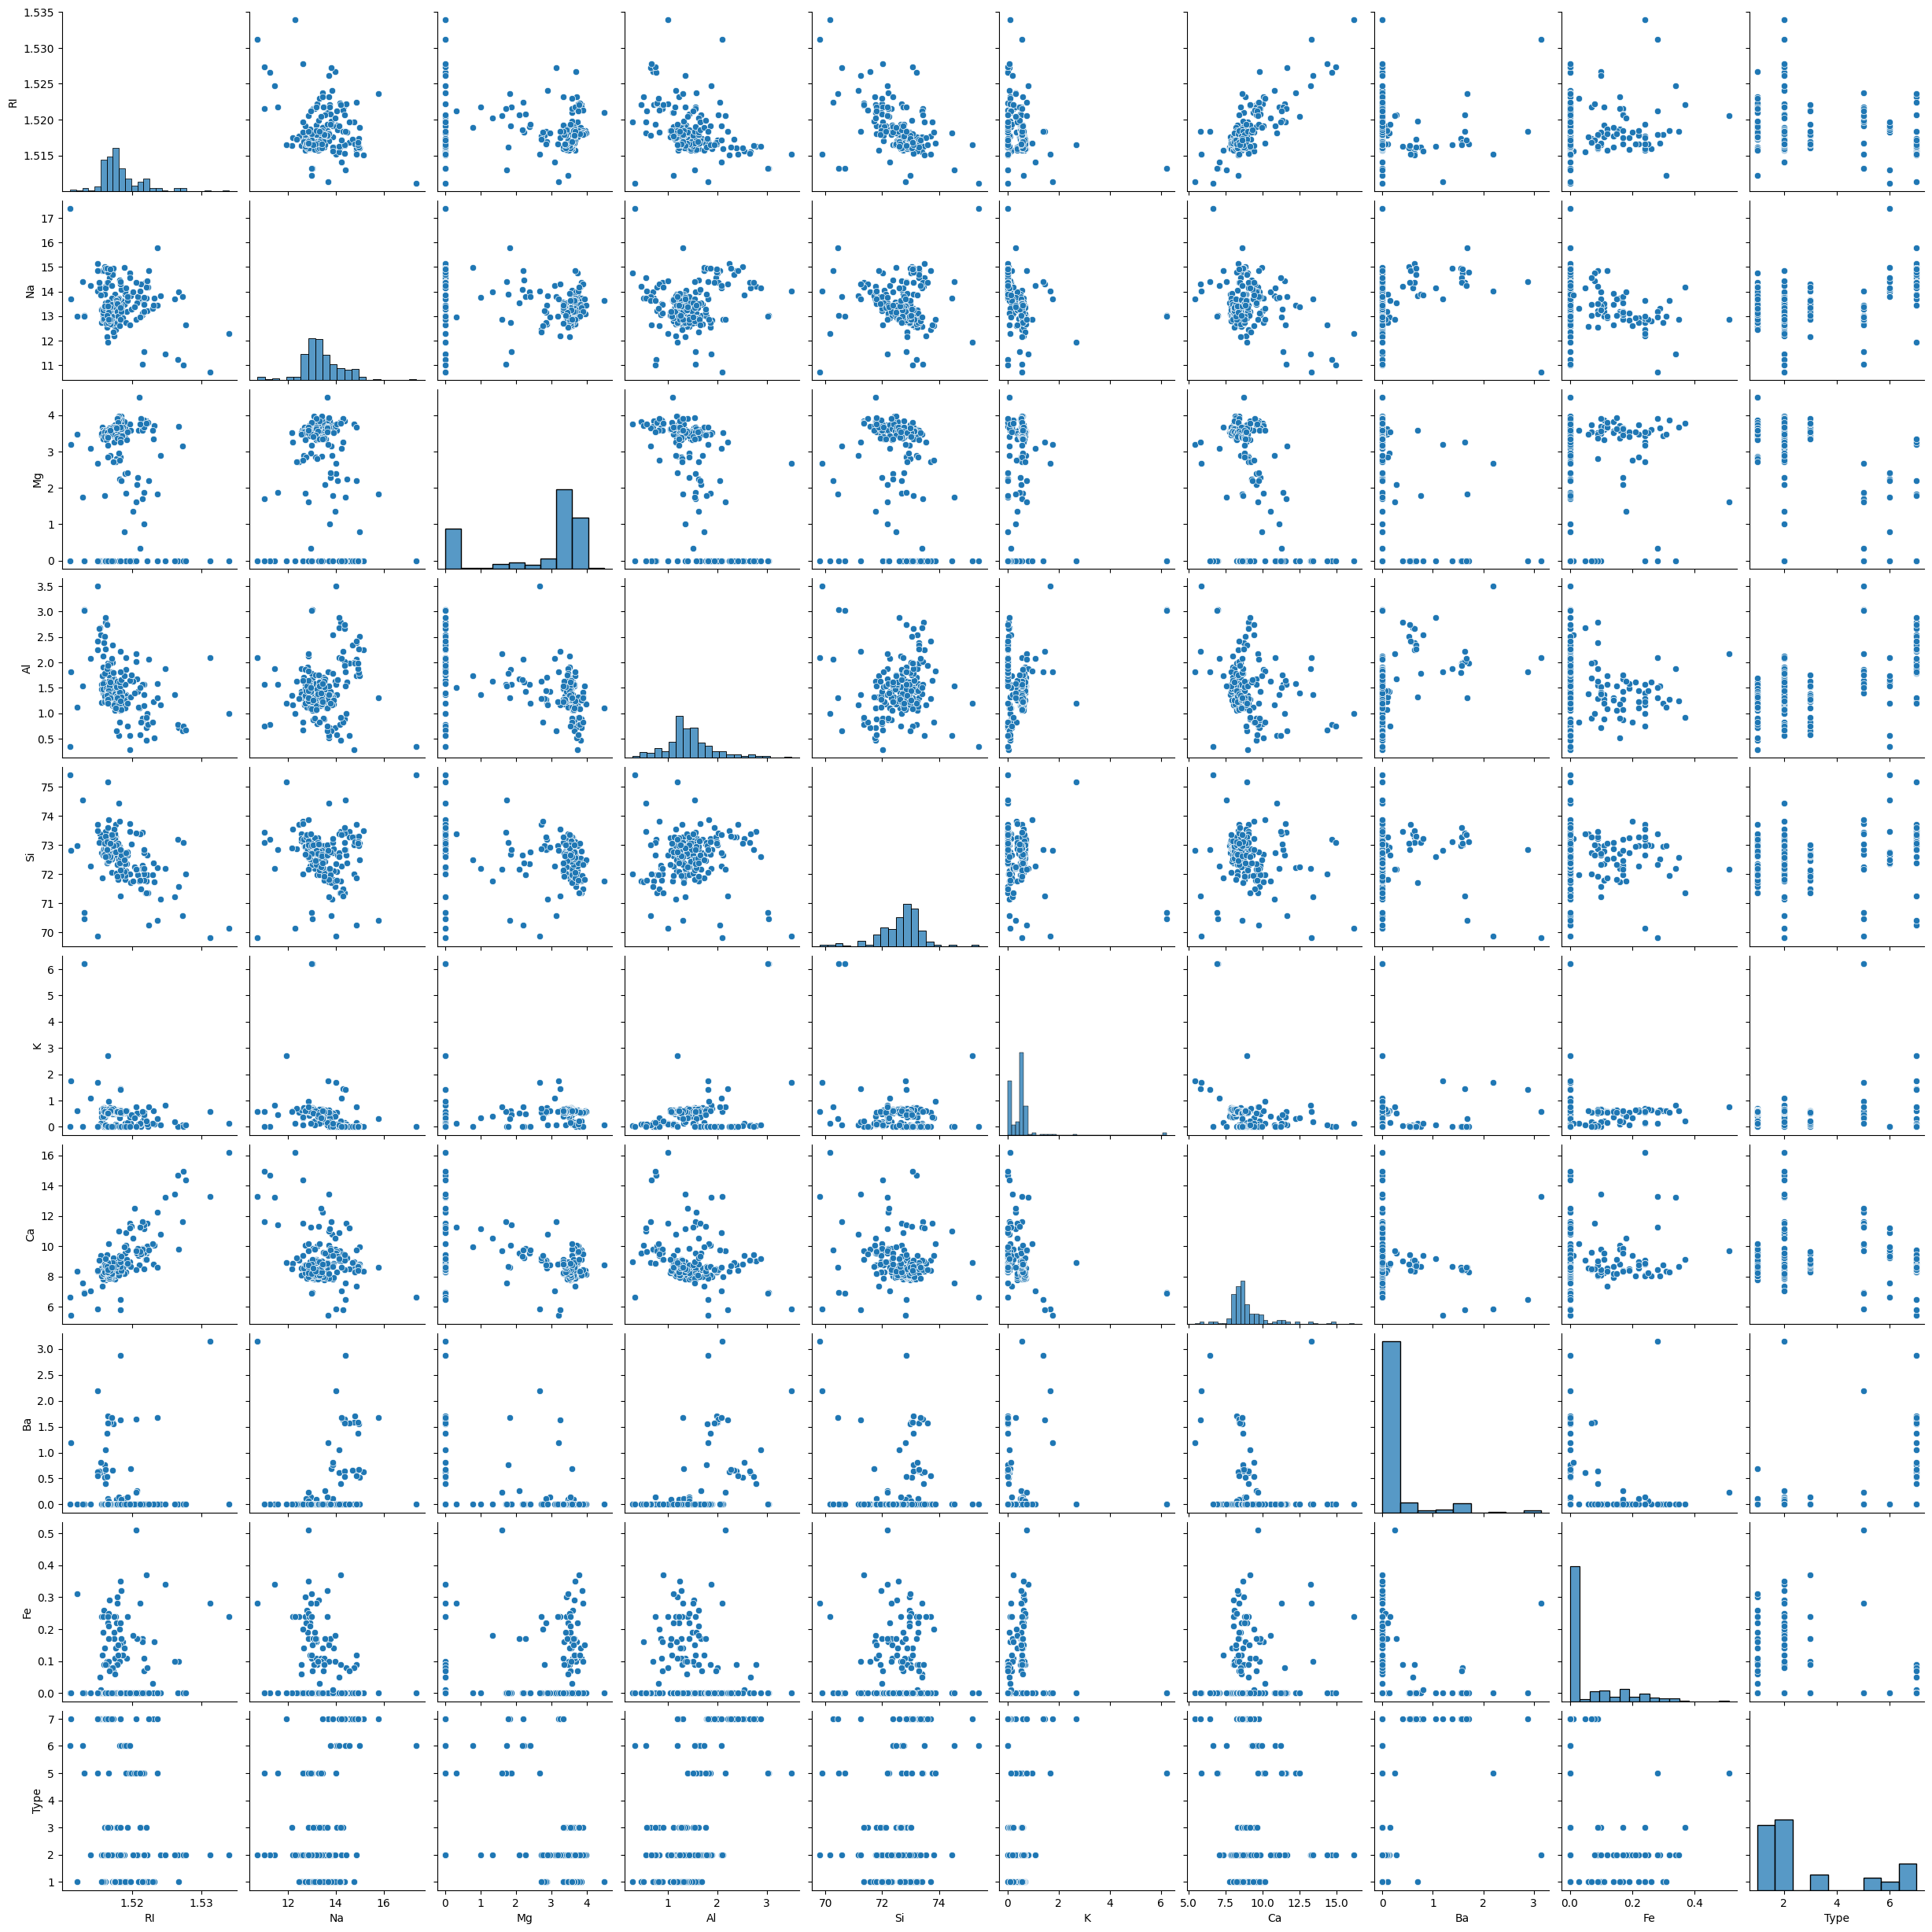

In [7]:
#visualize the data
plt.figure(figsize=(10,8))
sns.pairplot(data)
plt.show()



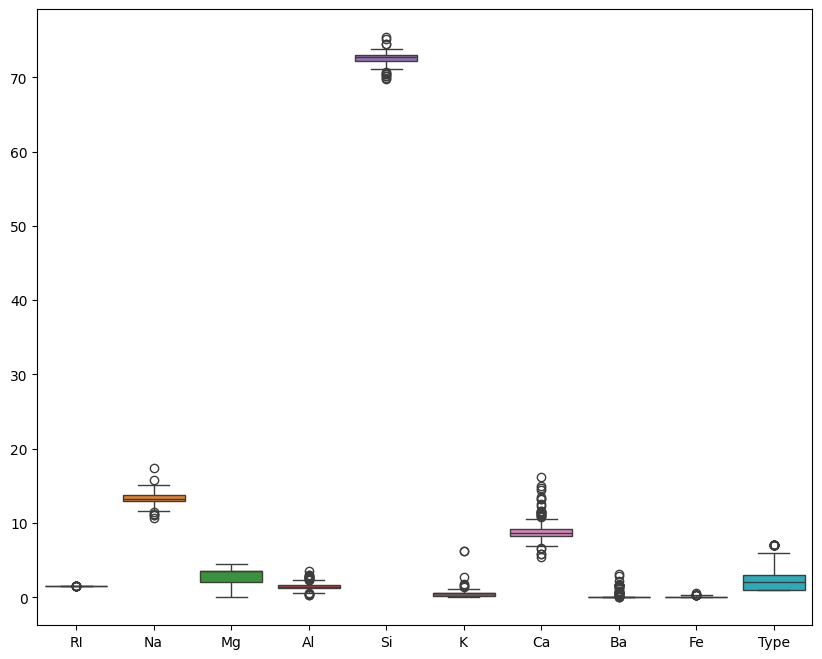

In [8]:
#check for outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.show()


In [9]:
data.shape,data.columns

((214, 10),
 Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object'))

In [10]:
data.drop_duplicates()

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[213 rows x 10 columns]

# data visuvalization

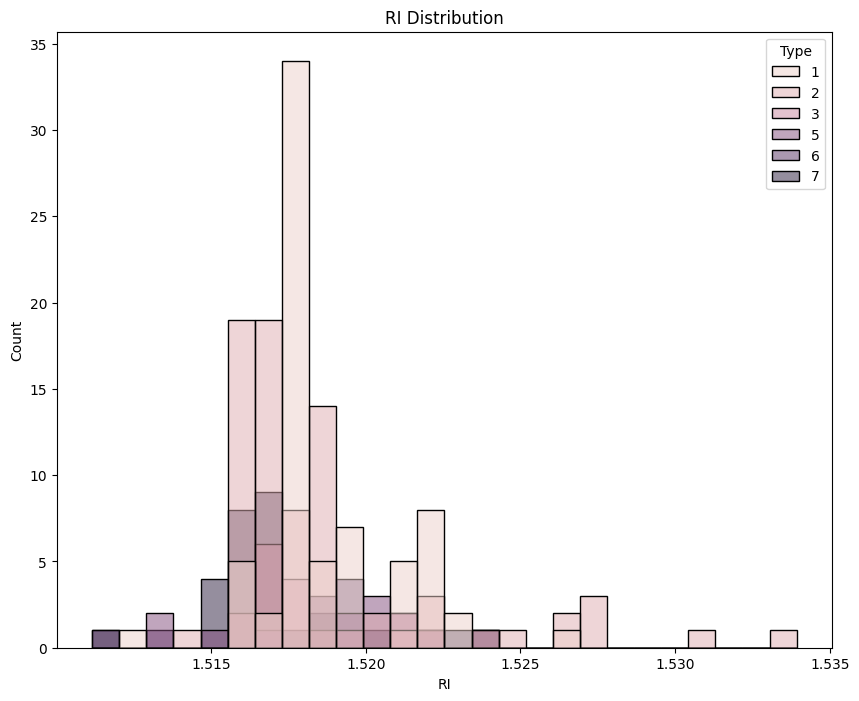

In [11]:
#Histograms:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x="RI", hue="Type")
plt.title("RI Distribution")
plt.show()


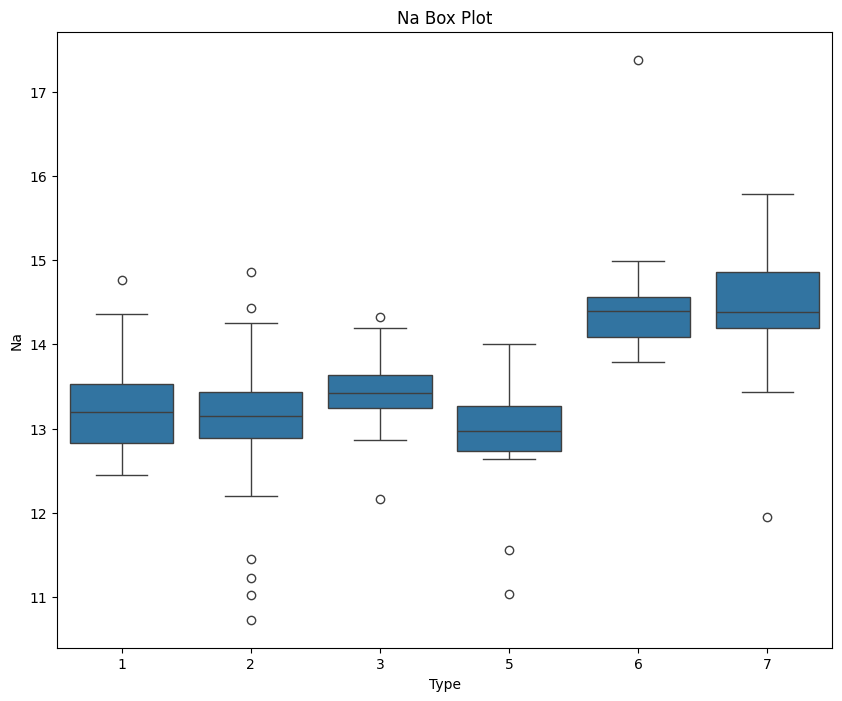

In [12]:
#boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x="Type", y="Na")
plt.title("Na Box Plot")
plt.show()


<Figure size 1000x800 with 0 Axes>

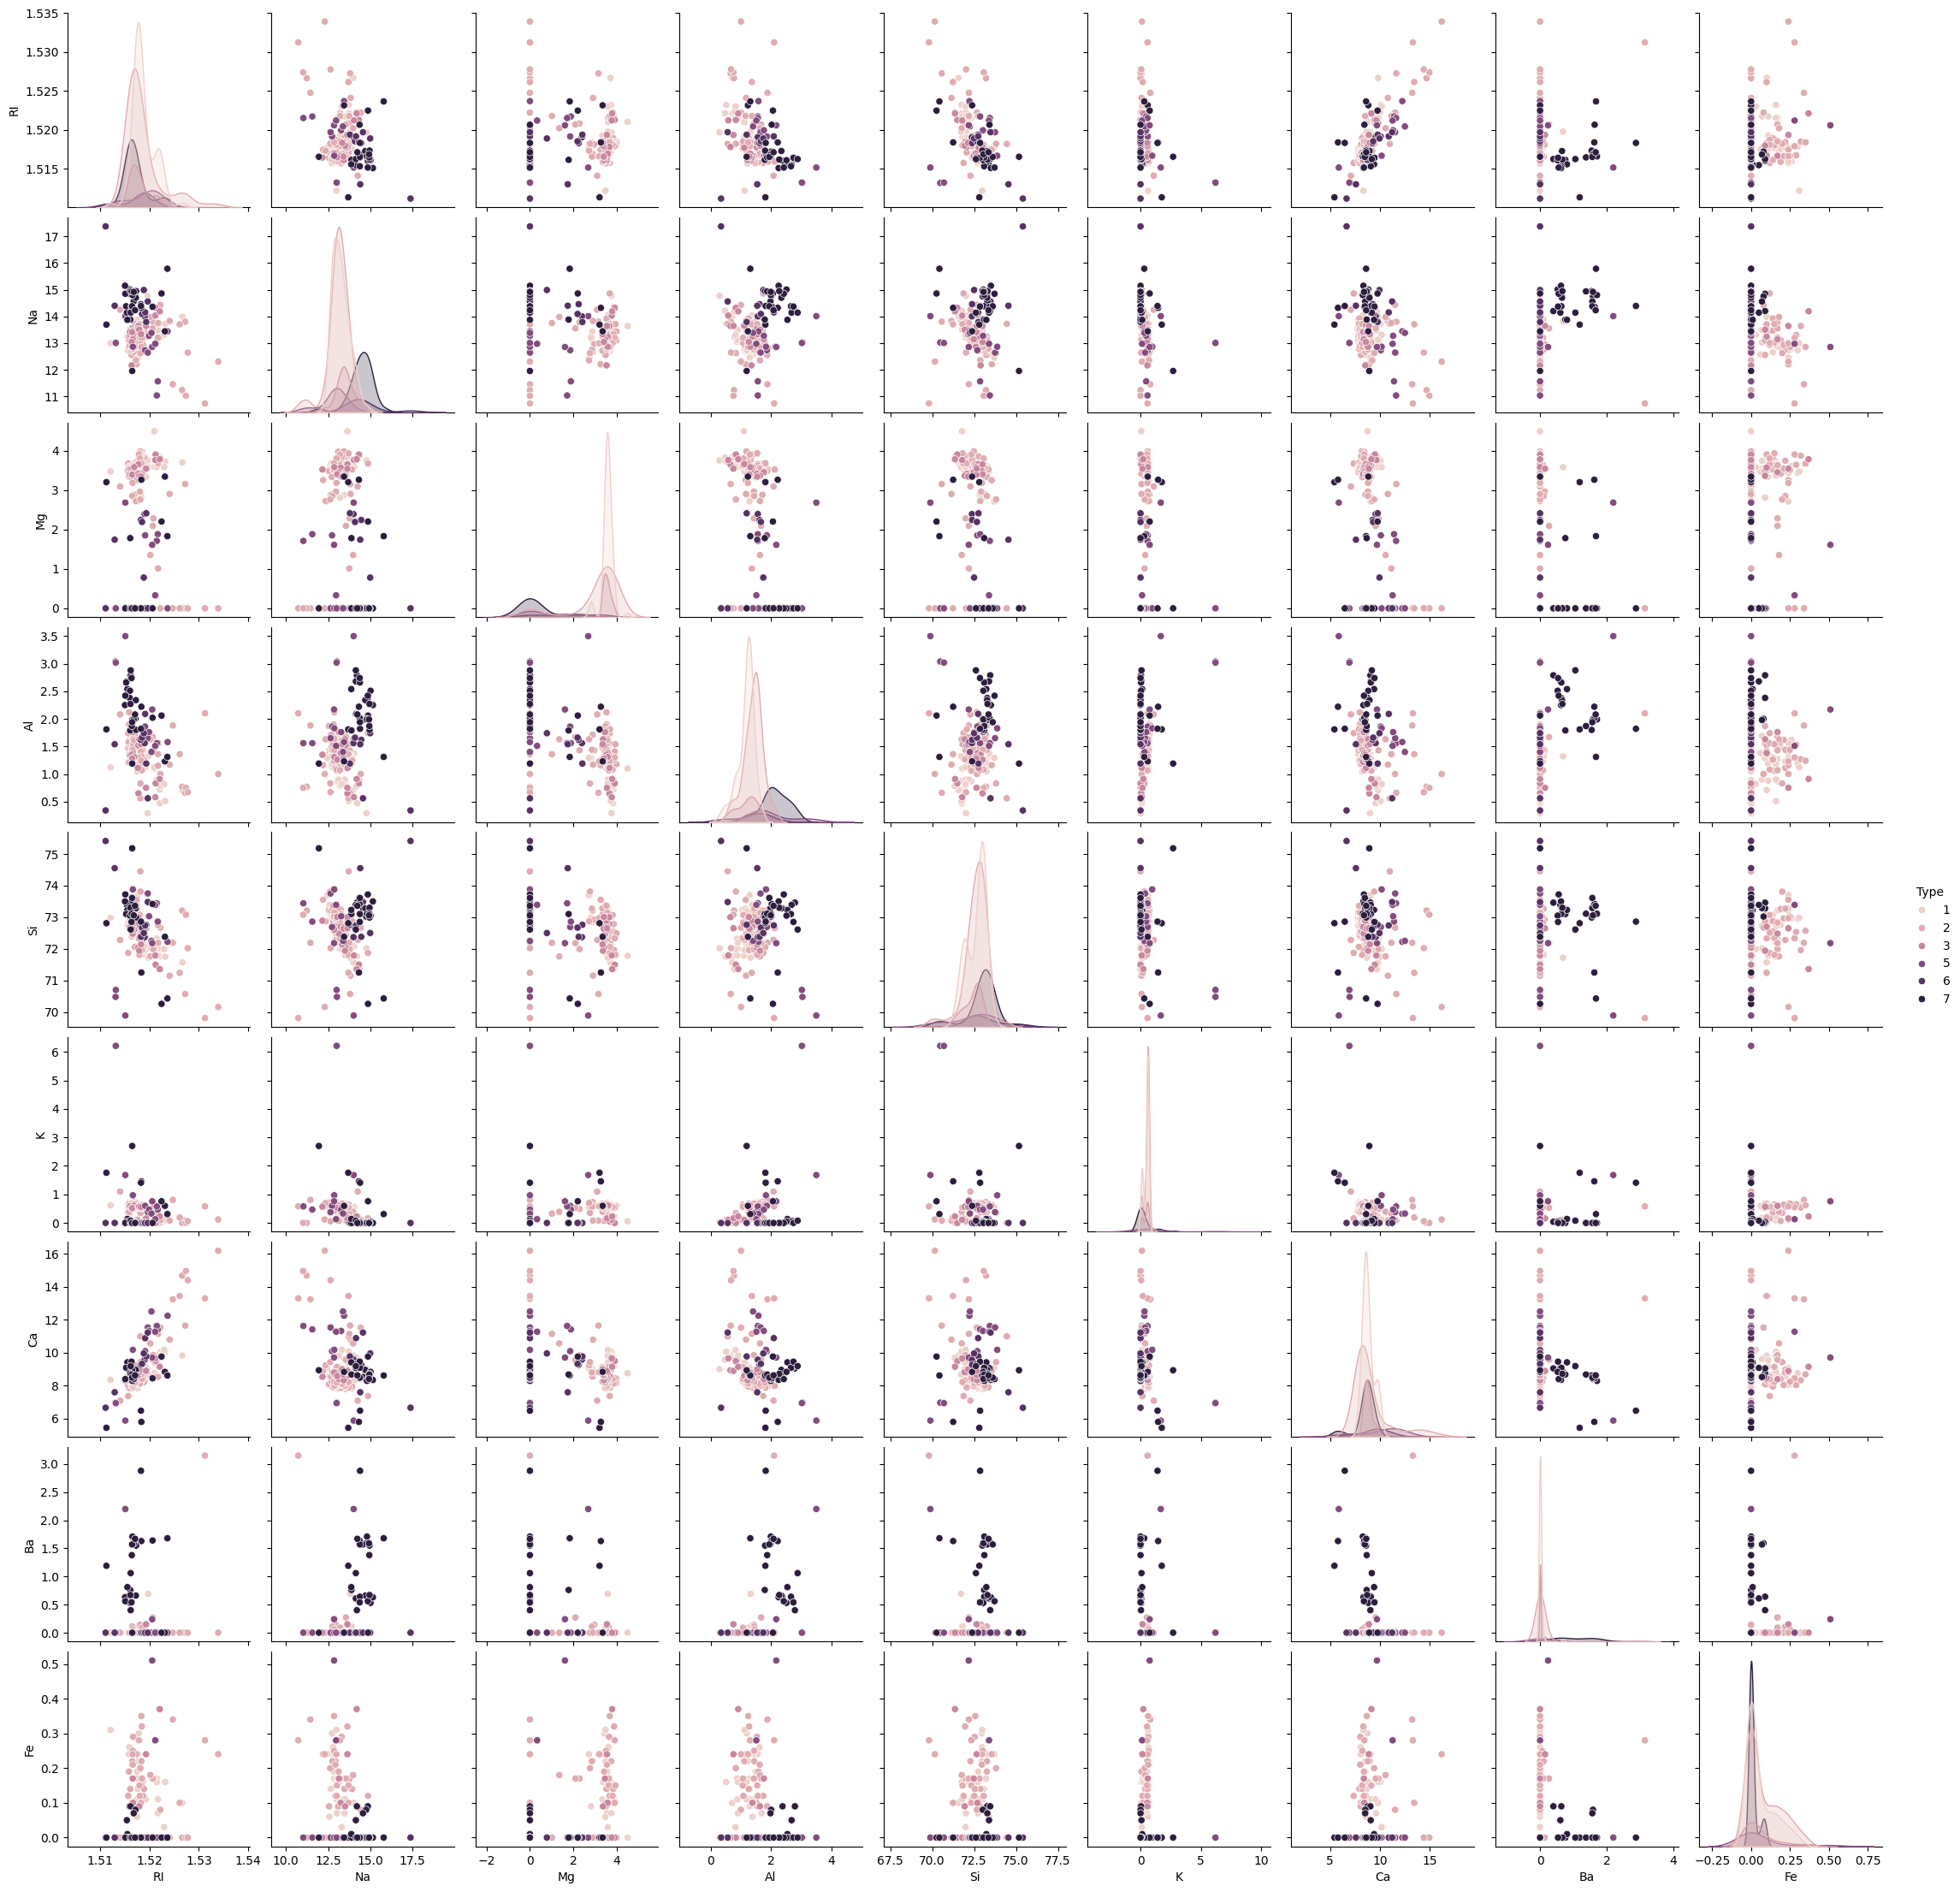

In [13]:
#pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(data=data, hue="Type")
plt.show()


In [14]:
data.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.744993  
Al    0.479404 -0.074402  0.598829  
Si   -0.102151 -0.094201  0.151565  
K    -0.042618 -0.007719 -0.010054  
Ca   -0.112841  0.124968  0.000952  
Ba    1.000000 -0.058692  0.575161  
Fe   -0.058692  1.000000 -0.188278  
Type  0.575161 -0.188278  1.000000

# data preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [16]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x,y

(          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
 ..       ...    ...   ...   ...    ...   ...   ...   ...  ...
 209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0
 
 [214 rows x 9 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 209    7
 210    7
 211    7
 212    7
 213    7
 Name: Type, Length: 214, dtype: int64)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,y_train.shape

((171, 9), (171,))

In [18]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train,y_train

(array([[-0.84623746, -0.74467528,  0.52636164, ..., -0.68807645,
         -0.33761134, -0.60110996],
        [ 0.28077633,  0.33413832,  0.54088841, ..., -0.03692037,
         -0.04564469,  1.78472688],
        [-0.0992632 ,  0.43938842, -2.03034913, ...,  1.44941417,
         -0.33761134, -0.60110996],
        ...,
        [-0.85278986, -0.34998738,  0.44646443, ..., -0.39080954,
         -0.33761134,  1.28767753],
        [ 0.0121277 ,  0.92617017, -0.43966828, ...,  0.26742432,
         -0.33761134, -0.60110996],
        [-0.09271079, -1.00780055, -0.02565546, ...,  0.33820216,
         -0.33761134,  1.3870874 ]]),
 79     2
 161    3
 109    2
 127    2
 95     2
       ..
 106    2
 14     1
 92     2
 179    6
 102    2
 Name: Type, Length: 171, dtype: int64)

# Random forest model

In [19]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [20]:
#Predict the labels of the test set
y_pred = clf.predict(x_train)
y_pred

array([2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5,
       2, 1, 2, 6, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 5, 2, 1, 3, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 3, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 6, 1, 7, 3, 2, 5, 1, 1,
       2, 1, 2, 1, 7, 3, 2, 1, 7, 1, 2, 5, 1, 3, 1, 2, 1, 2, 7, 5, 7, 1,
       2, 1, 1, 2, 2, 2, 7, 7, 2, 1, 1, 1, 6, 2, 1, 5, 2, 7, 2, 6, 7, 1,
       1, 2, 1, 5, 7, 5, 1, 1, 2, 1, 1, 3, 7, 7, 2, 1, 3, 7, 1, 1, 3, 2,
       3, 2, 2, 2, 2, 7, 2, 2, 7, 1, 7, 2, 2, 1, 2, 6, 2], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, clf.predict(x_test))
print("Accuracy:", accuracy)

Accuracy: 0.6046511627906976


In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, clf.predict(x_train))
print("Accuracy:", accuracy)

Accuracy: 1.0


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        21

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [25]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(x_test),y_test))

              precision    recall  f1-score   support

           1       0.55      0.46      0.50        13
           2       0.64      0.53      0.58        17
           3       0.00      0.00      0.00         1
           5       0.50      0.67      0.57         3
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         8

    accuracy                           0.60        43
   macro avg       0.50      0.61      0.53        43
weighted avg       0.65      0.60      0.62        43



# bagging and boosting

In [37]:
# Bagging: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier :", rf_accuracy)

Random Forest Classifier Accuracy: 0.6046511627906976


In [39]:
#adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME')
# Boosting: AdaBoost Classifier
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42,algorithm='SAMME')
adb_clf.fit(x_train, y_train)
adb_pred = adb_clf.predict(x_test)
adb_accuracy = accuracy_score(y_test, adb_pred)
print("AdaBoost Classifier :", adb_accuracy)

AdaBoost Classifier Accuracy: 0.5581395348837209


1.Bagging and Boosting:
Bagging combines multiple models trained on different subsets of data to reduce variance, while Boosting combines models trained on the same data with increasing weights on errors to reduce bias. Bagging is parallel and robust, while Boosting is sequential and sensitive to outliers.


2.Handling Imbalance:
To handle imbalance, use techniques like oversampling the minority class, undersampling the majority class, or generating synthetic samples using SMOTE, and assign class weights or use anomaly detection algorithms. These methods help balance the data and improve model performance on the minority class.